In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc

In [11]:
%%time
# Read Data
training_data_df = pd.read_csv('./prepped_data/training_data_ver_6.csv')
print(training_data_df.shape)
training_data_df.head()

(3550554, 195)
Wall time: 25 s


,지번주소,도로명주소,trade_type,전용면적(㎡),금액(만원),가격/면적,층,년,월,건물나이,target_log_transformed,target/area_log_transformed,특수지구분명,공시지가(만원),표준지여부,지목코드,토지면적_log,용도지역코드1,용도지역코드2,지형높이코드,지형형상코드,도로접면코드,month_sin,month_cos,x_norm,y_norm,x_2nd,y_2nd,x*y,x_sin,y_sin,x_cos,y_cos,(한강)폐기물매립시설 설치제한지역,가로구역별 최고높이 제한지역,가축사육제한구역,개발제한구역,개발행위허가제한지역,건축선,건축용도지역기타,건축허가·착공제한지역,경관녹지,경관지구,고도지구,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공주택지구,공공청사,공동구,공원,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,과밀억제권역,광로1류(폭 70M 이상),광로2류(폭 50M~70M),광로3류(폭 40M~50M),광역계획구역,광장,교육환경보호구역,국가산업단지,국가지정문화재구역,국립공원,국민임대주택단지예정지구,국토이용용도지구기타,근린공원,근린상업지역,기타녹지시설,기타도로시설,녹지,대공방어협조구역,대공방어협조구역(위탁고도:54-236m),대공방어협조구역(위탁고도:77-257m),대로1류(폭 35M~40M),대로2류(폭 30M~35M),대로3류(폭 25M~30M),도로,도로구역,도서관,도시개발구역,도시관리계획 입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시자연공원구역,도시지역,도시지역기타,도시철도,문화시설,문화재보존영향 검토대상구역,문화재보호구역,문화재보호구역기타,방수설비,방화지구,보전산지,보전임지,보행자전용도로,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사방지,사업지역기타,사회복지시설,산업시설구역,상대보호구역,생산녹지지역,소공원,소로1류(폭 10M~12M),소로2류(폭 8M~10M),소로3류(폭 8M 미만),수도공급시설,수평표면구역,시장,아파트지구,야생생물보호구역,어린이공원,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,완충녹지,용도구역기타,용도구역미분류,원추표면구역,유수지,유통단지,유통상업지역,유통업무설비,일단의주택단지조성사업지역,일반도로,일반상업지역,일반주거지역,임업용산지,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재정비촉진지구,재정비촉진지구기타,전기공급설비,전통사찰보존구역,절대보호구역,정비구역,정비구역기타,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종 구역,제3종일반주거지역,제한보호구역,제한보호구역(전술항공:5km),제한보호구역(후방지역:500m),조망가로특화경관지구,종합의료시설,주차장,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭 20M~25M),중로2류(폭 15M~20M),중로3류(폭 12M~15M),중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지하도로,진입표면구역,철도,초등학교,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,특정개발진흥지구,하수도,하수종말처리시설,하천,하천구역,학교,현상변경허가 대상구역
0,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,0,77.75,57000,733.118971,2,2013,9,25,10.950807,6.597308,1,921.0,0,8,7.063305,15,0,2,3,3,-0.866025,-0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,0,77.75,57000,733.118971,2,2013,12,25,10.950807,6.597308,1,921.0,0,8,7.063305,15,0,2,3,3,-0.500000,0.866025,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,1,77.75,35000,450.160772,4,2013,1,25,10.463103,6.109605,1,921.0,0,8,7.063305,15,0,2,3,3,0.000000,1.000000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,1,77.75,32000,411.575563,9,2013,3,25,10.373491,6.019993,1,921.0,0,8,7.063305,15,0,2,3,3,0.866025,0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로

In [12]:
training_data_df['층'].value_counts()

 2     473899
 3     447069
 4     384515
 1     296585
 5     289262
 6     186483
 7     162412
 8     149425
 9     143604
 10    137428
 11    126858
 12    121008
 13    105785
 14     98370
 15     88552
-1      56259
 16     46543
 17     43404
 18     38856
 19     32087
 20     26839
 21     19244
 22     16491
 23     13403
 24     10377
 25      8078
 26      5017
 27      4158
 28      3208
 29      2576
 30      2017
 31      1652
 32      1354
 33      1174
 34      1032
 35       901
 0        684
 36       674
 37       423
 38       399
 39       333
 40       212
 41       210
 43       167
 42       163
 46       143
 44       134
 45       119
 47       118
-2        103
 48       100
 49        89
 51        65
 50        58
 53        56
 54        55
 52        52
 58        38
 55        25
 57        25
 60        23
 63        21
 66        20
-3         20
 59        19
 56        18
 62        13
 64        11
 68        10
 67         9
 65         6
 61   

In [13]:
training_data_df['층'] = training_data_df['층'].apply(lambda x: -2 if x < -2 else x)
training_data_df['층'].value_counts()

 2     473899
 3     447069
 4     384515
 1     296585
 5     289262
 6     186483
 7     162412
 8     149425
 9     143604
 10    137428
 11    126858
 12    121008
 13    105785
 14     98370
 15     88552
-1      56259
 16     46543
 17     43404
 18     38856
 19     32087
 20     26839
 21     19244
 22     16491
 23     13403
 24     10377
 25      8078
 26      5017
 27      4158
 28      3208
 29      2576
 30      2017
 31      1652
 32      1354
 33      1174
 34      1032
 35       901
 0        684
 36       674
 37       423
 38       399
 39       333
 40       212
 41       210
 43       167
 42       163
 46       143
 44       134
-2        129
 45       119
 47       118
 48       100
 49        89
 51        65
 50        58
 53        56
 54        55
 52        52
 58        38
 55        25
 57        25
 60        23
 63        21
 66        20
 59        19
 56        18
 62        13
 64        11
 68        10
 67         9
 61         6
 65         6
 69   

In [14]:
training_data_df['층'] = training_data_df['층'].apply(lambda x: 1 if x == 0 else x)
training_data_df['층'] = training_data_df['층'].apply(lambda x: 51 if x > 50 else x)
training_data_df['층'] = training_data_df['층'].apply(lambda x: 50 if (x <= 50) & (x > 35) else x)
training_data_df['층'] = training_data_df['층'].apply(lambda x: 35 if (x <= 35) & (x > 25) else x)

In [15]:
training_data_df['층'].value_counts()

 2     473899
 3     447069
 4     384515
 1     297269
 5     289262
 6     186483
 7     162412
 8     149425
 9     143604
 10    137428
 11    126858
 12    121008
 13    105785
 14     98370
 15     88552
-1      56259
 16     46543
 17     43404
 18     38856
 19     32087
 20     26839
 35     23089
 21     19244
 22     16491
 23     13403
 24     10377
 25      8078
 50      3342
 51       474
-2        129
Name: 층, dtype: int64

In [16]:
floor_map_df = pd.DataFrame({'floor':training_data_df['층'].unique(), 'map':[i for i in range(len(training_data_df['층'].unique()))]})
floor_map_df.to_csv('./feature_maps/floor_map_for_ver_6.csv', index=False)
floor_map = {}
for i in range(floor_map_df.shape[0]):
    floor_map[floor_map_df['floor'][i]] = floor_map_df['map'][i]
floor_map

{2: 0,
 4: 1,
 9: 2,
 1: 3,
 5: 4,
 3: 5,
 10: 6,
 6: 7,
 12: 8,
 8: 9,
 15: 10,
 11: 11,
 13: 12,
 14: 13,
 7: 14,
 16: 15,
 18: 16,
 19: 17,
 20: 18,
 17: 19,
 21: 20,
 22: 21,
 35: 22,
 23: 23,
 25: 24,
 24: 25,
 -1: 26,
 50: 27,
 51: 28,
 -2: 29}

In [17]:
training_data_df['건물나이'].value_counts()

0     157758
4     137988
12    135275
13    132194
6     131835
14    131738
11    130808
10    129843
15    129752
5     127936
8     127773
9     127543
16    123848
7     122977
1     120572
2     115230
3     114138
17    111781
18    107113
19     95225
20     92643
21     84839
23     78203
22     77967
24     73338
25     71905
26     70007
27     65033
28     61821
29     55387
30     49846
31     48342
32     43293
33     34575
34     27610
35     21030
36     17197
37     14123
38     11072
39      8852
40      7716
41      6529
42      4859
43      3293
44      2654
45      1925
46      1684
47      1146
48       875
49       691
50       316
51       169
52        67
53        49
54        45
55        25
56        19
59        18
57        17
58        16
64        14
60        10
88         2
61         2
89         2
86         1
Name: 건물나이, dtype: int64

In [18]:
training_data_df[training_data_df['건물나이'] == 89]

,지번주소,도로명주소,trade_type,전용면적(㎡),금액(만원),가격/면적,층,년,월,건물나이,target_log_transformed,target/area_log_transformed,특수지구분명,공시지가(만원),표준지여부,지목코드,토지면적_log,용도지역코드1,용도지역코드2,지형높이코드,지형형상코드,도로접면코드,month_sin,month_cos,x_norm,y_norm,x_2nd,y_2nd,x*y,x_sin,y_sin,x_cos,y_cos,(한강)폐기물매립시설 설치제한지역,가로구역별 최고높이 제한지역,가축사육제한구역,개발제한구역,개발행위허가제한지역,건축선,건축용도지역기타,건축허가·착공제한지역,경관녹지,경관지구,고도지구,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공주택지구,공공청사,공동구,공원,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,과밀억제권역,광로1류(폭 70M 이상),광로2류(폭 50M~70M),광로3류(폭 40M~50M),광역계획구역,광장,교육환경보호구역,국가산업단지,국가지정문화재구역,국립공원,국민임대주택단지예정지구,국토이용용도지구기타,근린공원,근린상업지역,기타녹지시설,기타도로시설,녹지,대공방어협조구역,대공방어협조구역(위탁고도:54-236m),대공방어협조구역(위탁고도:77-257m),대로1류(폭 35M~40M),대로2류(폭 30M~35M),대로3류(폭 25M~30M),도로,도로구역,도서관,도시개발구역,도시관리계획 입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시자연공원구역,도시지역,도시지역기타,도시철도,문화시설,문화재보존영향 검토대상구역,문화재보호구역,문화재보호구역기타,방수설비,방화지구,보전산지,보전임지,보행자전용도로,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사방지,사업지역기타,사회복지시설,산업시설구역,상대보호구역,생산녹지지역,소공원,소로1류(폭 10M~12M),소로2류(폭 8M~10M),소로3류(폭 8M 미만),수도공급시설,수평표면구역,시장,아파트지구,야생생물보호구역,어린이공원,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,완충녹지,용도구역기타,용도구역미분류,원추표면구역,유수지,유통단지,유통상업지역,유통업무설비,일단의주택단지조성사업지역,일반도로,일반상업지역,일반주거지역,임업용산지,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재정비촉진지구,재정비촉진지구기타,전기공급설비,전통사찰보존구역,절대보호구역,정비구역,정비구역기타,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종 구역,제3종일반주거지역,제한보호구역,제한보호구역(전술항공:5km),제한보호구역(후방지역:500m),조망가로특화경관지구,종합의료시설,주차장,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭 20M~25M),중로2류(폭 15M~20M),중로3류(폭 12M~15M),중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지하도로,진입표면구역,철도,초등학교,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,특정개발진흥지구,하수도,하수종말처리시설,하천,하천구역,학교,현상변경허가 대상구역
2949107,서울특별시 종로구 창신동 23-575,서울특별시 종로구 창신11길 34-0,3,39.82,8500,213.460573,3,2014,3,89,9.047821,5.363452,1,218.9,0,8,5.087596,14,0,5,4,9,0.866025,0.5,1851.727634,1707.660367,3.428895e+06,2.916104e+06,3.162122e+06,-0.971044,-0.97911,-0.238902,0.203332,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2949108,서울특별시 종로구 창신동 23-575,서울특별시 종로구 창신11길 34-0,4,74.36,10000,134.480904,2,2014,3,89,9.210340,4.901422,1,218.9,0,8,5.087596,14,0,5,4,9,0.866025,0.5,1851.727634,1707.660367,3.428895e+06,2.916104e+06,3.162122e+06,-0.971044,-0.97911,-0.238902,0.203332,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
training_data_df['건물나이'] = training_data_df['건물나이'].apply(lambda x: 40 if x >= 40 else x)
training_data_df['건물나이'].value_counts()

0     157758
4     137988
12    135275
13    132194
6     131835
14    131738
11    130808
10    129843
15    129752
5     127936
8     127773
9     127543
16    123848
7     122977
1     120572
2     115230
3     114138
17    111781
18    107113
19     95225
20     92643
21     84839
23     78203
22     77967
24     73338
25     71905
26     70007
27     65033
28     61821
29     55387
30     49846
31     48342
32     43293
33     34575
40     32144
34     27610
35     21030
36     17197
37     14123
38     11072
39      8852
Name: 건물나이, dtype: int64

In [20]:
training_data_df['건물나이'] = training_data_df['건물나이'].apply(lambda x: 30 if (x < 40) & (x >= 30) else x)
training_data_df['건물나이'] = training_data_df['건물나이'].apply(lambda x: 20 if (x < 30) & (x >= 20) else x)
training_data_df['건물나이'] = training_data_df['건물나이'].apply(lambda x: 15 if (x < 20) & (x >= 15) else x)
training_data_df['건물나이'].value_counts()

20    731143
15    567719
30    275940
0     157758
4     137988
12    135275
13    132194
6     131835
14    131738
11    130808
10    129843
5     127936
8     127773
9     127543
7     122977
1     120572
2     115230
3     114138
40     32144
Name: 건물나이, dtype: int64

In [21]:
building_age_map_df = pd.DataFrame({'age':training_data_df['건물나이'].unique(), 'map':[i for i in range(len(training_data_df['건물나이'].unique()))]})
building_age_map_df.to_csv('./feature_maps/bd_age_map_for_ver_6.csv', index=False)
bd_age_map = {}
for i in range(building_age_map_df.shape[0]):
    bd_age_map[building_age_map_df['age'][i]] = building_age_map_df['map'][i]
bd_age_map

{20: 0,
 9: 1,
 30: 2,
 11: 3,
 13: 4,
 7: 5,
 10: 6,
 14: 7,
 12: 8,
 15: 9,
 0: 10,
 1: 11,
 2: 12,
 3: 13,
 6: 14,
 4: 15,
 5: 16,
 8: 17,
 40: 18}

In [22]:
training_data_df['층'] = training_data_df['층'].map(floor_map)
training_data_df['건물나이'] = training_data_df['건물나이'].map(bd_age_map)

In [4]:
land_plans_df = pd.read_csv('./prepped_data/land_plans_ver_2.csv')

In [29]:
#training_data_df.to_csv('./prepped_data/training_data_ver_6.1.csv')

In [25]:
cat_cols1 = []
for col in training_data_df.columns:
    if col in land_plans_df.columns[3:]:
        cat_cols1.append(col)
print(len(cat_cols1))

162


In [27]:
cat_cols2 = ['trade_type', '특수지구분명', '표준지여부', '지목코드', '용도지역코드1', '용도지역코드2', '지형높이코드',
            '지형형상코드', '도로접면코드', '층', '건물나이', '년', '월'
           ]

cat_cols = cat_cols1 + cat_cols2
print(len(cat_cols))

175


In [30]:
col_maps_df = pd.DataFrame({'col':training_data_df.columns, 'map':['{}'.format(i) for i in range(len(training_data_df.columns))]})
col_maps_df.to_csv('col_map_for_ver_6.1.csv', index=False)
col_map = {}
for i in range(col_maps_df.shape[0]):
    col_map[col_maps_df['col'][i]] = col_maps_df['map'][i]
training_data_df.columns = [col_map[col] for col in training_data_df.columns]
training_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
0,0,77.75,57000,733.118971,0,2013,9,0,10.950807,6.597308,1,921.0,0,8,7.063305,15,0,2,3,3,-0.866025,-0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,77.75,57000,733.118971,0,2013,12,0,10.950807,6.597308,1,921.0,0,8,7.063305,15,0,2,3,3,-0.500000,0.866025,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,77.75,35000,450.160772,1,2013,1,0,10.463103,6.109605,1,921.0,0,8,7.063305,15,0,2,3,3,0.000000,1.000000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,77.75,32000,411.575563,2,2013,3,0,10.373491,6.019993,1,921.0,0,8,7.063305,15,0,2,3,3,0.866025,0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,77.75,37000,475.884244,3,2013,9,0,10.518673,6.165175,1,921.0,0,8,7.063305,15,0,2,3,3,-0.866025,-0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
cat_cols_mapped = [col_map[col] for col in cat_cols]
print(len(cat_cols_mapped))

175


In [39]:
cat_cols_mapped[-5:]

['19', '4', '7', '5', '6']

In [40]:
weak_cols = []
for col in cat_cols_mapped:
    if (training_data_df[col].value_counts().iloc[0] / training_data_df.shape[0]) >= 0.9:
        weak_cols.append(col)
        
weak_cols

['32',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '57',
 '58',
 '59',
 '60',
 '61',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '74',
 '75',
 '76',
 '77',
 '78',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '150',
 '151',
 '153',
 '156',
 '157',
 '159',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '172',
 '173',
 '175',
 '177',
 '178',
 '179

In [41]:
len(weak_cols)

149

In [42]:
test_data = training_data_df.sample(frac=0.2)
train_data = training_data_df.drop(test_data.index)
valid_data = train_data.sample(frac=0.2)
train_data = train_data.drop(valid_data.index)
print(test_data.shape)
print(valid_data.shape)
print(train_data.shape)

(710111, 193)
(568089, 193)
(2272354, 193)


In [43]:
target_cols = ['금액(만원)', '가격/면적', 'target_log_transformed', 'target/area_log_transformed']#, 'land_area_log']

In [45]:
target_cols_mapped = [col_map[col] for col in target_cols]
target_cols_mapped

['2', '3', '8', '9']

In [76]:
year_map_df = pd.DataFrame({'year':training_data_df[col_map['년']].unique(), 'map':[i for i in range(len(training_data_df[col_map['년']].unique()))]})
year_map_df.to_csv('./feature_maps/year_map_for_ver_6.1.csv', index=False)
year_map = {}
for i in range(year_map_df.shape[0]):
    year_map[year_map_df['year'][i]] = year_map_df['map'][i]
year_map

{2013: 0,
 2014: 1,
 2016: 2,
 2017: 3,
 2018: 4,
 2019: 5,
 2020: 6,
 2006: 7,
 2007: 8,
 2008: 9,
 2009: 10,
 2010: 11,
 2011: 12,
 2012: 13,
 2015: 14}

In [78]:
training_data_df[col_map['년']] = training_data_df[col_map['년']].map(year_map)

In [79]:
training_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
0,0,77.75,57000,733.118971,0,0,9,0,10.950807,6.597308,1,921.0,0,8,7.063305,15,0,2,3,3,-0.866025,-0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,77.75,57000,733.118971,0,0,12,0,10.950807,6.597308,1,921.0,0,8,7.063305,15,0,2,3,3,-0.500000,0.866025,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,77.75,35000,450.160772,1,0,1,0,10.463103,6.109605,1,921.0,0,8,7.063305,15,0,2,3,3,0.000000,1.000000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,77.75,32000,411.575563,2,0,3,0,10.373491,6.019993,1,921.0,0,8,7.063305,15,0,2,3,3,0.866025,0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,77.75,37000,475.884244,3,0,9,0,10.518673,6.165175,1,921.0,0,8,7.063305,15,0,2,3,3,-0.866025,-0.500000,5540.076032,-9058.615505,3.069244e+07,8.205851e+07,-5.018542e+07,-0.992492,0.986102,-0.122306,-0.166138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
x_test = test_data.drop(columns=target_cols_mapped)
y_test = test_data[col_map['target/area_log_transformed']]
print(x_test.shape)
print(y_test.shape)

(710111, 189)
(710111,)


In [81]:
x_valid = valid_data.drop(columns=target_cols_mapped)
y_valid = valid_data[col_map['target/area_log_transformed']]
print(x_valid.shape)
print(y_valid.shape)

(568089, 189)
(568089,)


In [82]:
x_train = train_data.drop(columns=target_cols_mapped)
y_train = train_data[col_map['target/area_log_transformed']]
print(x_train.shape)
print(y_train.shape)

(2272354, 189)
(2272354,)


<AxesSubplot:>

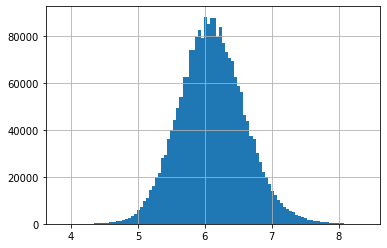

In [83]:
y_train.hist(bins=100)

# Training

In [84]:
from sklearn.metrics import r2_score

# ML Models

# Light GBM

In [85]:
import lightgbm as lgb

In [86]:
params = {
    'objective':'regression',
    'learning_rate': 0.03,
    'num_leaves': 31,
    'seed': 42,
    'max_depth': -1,
    'lambda_l2':0,
    'metric':'rmse'
}

In [87]:
train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols_mapped)
valid_dataset = lgb.Dataset(x_valid, label=y_valid, categorical_feature=cat_cols_mapped)

In [ ]:
num_rounds = 500000

bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[valid_dataset], early_stopping_rounds=500, verbose_eval=50)

[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.295130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3791
[LightGBM] [Info] Number of data points in the train set: 2272354, number of used features: 189
[LightGBM] [Info] Start training from score 6.108594
Training until validation scores don't improve for 500 rounds
[50]	valid_0's rmse: 0.274686
[100]	valid_0's rmse: 0.23018
[150]	valid_0's rmse: 0.212315
[200]	valid_0's rmse: 0.202324
[250]	valid_0's rmse: 0.19551
[300]	valid_0's rmse: 0.19031
[350]	valid_0's rmse: 0.186222
[400]	valid_0's rmse: 0.182993
[450]	valid_0's rmse: 0.180245
[500]	valid_0's rmse: 0.177757
[550]	valid_0's rmse: 0.175738
[600]	valid_0's rmse: 0.173971
[650]	valid_0's rmse

[11950]	valid_0's rmse: 0.131557
[12000]	valid_0's rmse: 0.131513
[12050]	valid_0's rmse: 0.131469
[12100]	valid_0's rmse: 0.131431
[12150]	valid_0's rmse: 0.131387
[12200]	valid_0's rmse: 0.131348
[12250]	valid_0's rmse: 0.131316
[12300]	valid_0's rmse: 0.131281
[12350]	valid_0's rmse: 0.131239
[12400]	valid_0's rmse: 0.131199
[12450]	valid_0's rmse: 0.131161
[12500]	valid_0's rmse: 0.131123
[12550]	valid_0's rmse: 0.13109
[12600]	valid_0's rmse: 0.131054
[12650]	valid_0's rmse: 0.131018
[12700]	valid_0's rmse: 0.130975
[12750]	valid_0's rmse: 0.130936
[12800]	valid_0's rmse: 0.130898
[12850]	valid_0's rmse: 0.130866
[12900]	valid_0's rmse: 0.130834
[12950]	valid_0's rmse: 0.130804
[13000]	valid_0's rmse: 0.130771
[13050]	valid_0's rmse: 0.130735
[13100]	valid_0's rmse: 0.130692
[13150]	valid_0's rmse: 0.130652
[13200]	valid_0's rmse: 0.130619
[13250]	valid_0's rmse: 0.130583
[13300]	valid_0's rmse: 0.130546
[13350]	valid_0's rmse: 0.13051
[13400]	valid_0's rmse: 0.130474
[13450]	vali

[24450]	valid_0's rmse: 0.125508
[24500]	valid_0's rmse: 0.125489
[24550]	valid_0's rmse: 0.125472
[24600]	valid_0's rmse: 0.125457
[24650]	valid_0's rmse: 0.125443
[24700]	valid_0's rmse: 0.125428
[24750]	valid_0's rmse: 0.125411
[24800]	valid_0's rmse: 0.125398
[24850]	valid_0's rmse: 0.125382
[24900]	valid_0's rmse: 0.125365
[24950]	valid_0's rmse: 0.125351
[25000]	valid_0's rmse: 0.125337
[25050]	valid_0's rmse: 0.125323
[25100]	valid_0's rmse: 0.12531
[25150]	valid_0's rmse: 0.125295
[25200]	valid_0's rmse: 0.125281
[25250]	valid_0's rmse: 0.125266
[25300]	valid_0's rmse: 0.125253
[25350]	valid_0's rmse: 0.125235
[25400]	valid_0's rmse: 0.125221
[25450]	valid_0's rmse: 0.125202
[25500]	valid_0's rmse: 0.125187
[25550]	valid_0's rmse: 0.125171
[25600]	valid_0's rmse: 0.125157
[25650]	valid_0's rmse: 0.125144
[25700]	valid_0's rmse: 0.12513
[25750]	valid_0's rmse: 0.125116
[25800]	valid_0's rmse: 0.125103
[25850]	valid_0's rmse: 0.12509
[25900]	valid_0's rmse: 0.125077
[25950]	valid

In [ ]:
lgb.plot_importance(bst)

In [ ]:
pred = bst.predict(x_test, num_iteration=bst.best_iteration)

In [ ]:
pd.DataFrame(y_test).to_csv('y_test_2021_01_03_22_11.csv', index=False)

In [ ]:
pd.DataFrame({'pred':pred}).to_csv('lgb_pred_2021_01_03_22_12.csv', index=False)

In [ ]:
r2_score(y_test, pred)

In [ ]:
compare_df = pd.DataFrame({'y_test':y_test, 'pred':pred})
print(compare_df.shape)
compare_df.head()

In [ ]:
compare_df.tail()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, pred)

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
mean_squared_log_error(y_test, pred)

In [ ]:
pred_df = pd.DataFrame({'pred':pred})
print(pred_df.shape)
pred_df.head()

In [ ]:
negative_df = pred_df[pred_df['pred'] < 0]
print(negative_df.shape)

In [ ]:
negative_df

In [ ]:
y_test_df = pd.DataFrame({'y_test':y_test}).reset_index(drop=True)
print(y_test_df.shape)
y_test_df.head()

In [ ]:
y_test_df.loc[negative_df.index,:]

In [ ]:
col_map

In [ ]:
x_test.loc[y_test.iloc[negative_df.index].index,:]

# CatBoost

In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
train_pool = Pool(x_train, y_train, cat_features=cat_cols_mapped)
val_pool = Pool(x_valid, y_valid, cat_features=cat_cols_mapped)
test_pool = Pool(x_test, y_test, cat_features=cat_cols_mapped)

In [ ]:
model = CatBoostRegressor(task_type='GPU', iterations=100000, learning_rate=0.1)

In [ ]:
model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=100)